<a href="https://colab.research.google.com/github/Meshal-Css/T5Sd/blob/main/lab5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Call libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# call data frame
df = pd.read_csv("Salary_Data_3.csv")

In [ ]:
# view df

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2101,32.0,Female,Master's Degree,Full Stack Engineer,6.0,115000.0
3966,29.0,Female,High School,Junior Sales Associate,1.0,25000.0
589,28.0,Female,Bachelor's,Software Engineer,5.0,160000.0
2144,26.0,Male,Bachelor's Degree,Back end Developer,2.0,65000.0
2825,31.0,Female,Master's Degree,Senior Software Engineer,6.0,114290.0
698,27.0,Male,Bachelor's,Software Engineer,4.0,140000.0
5491,41.0,Male,Master's Degree,Senior Software Engineer,19.0,185000.0
6403,45.0,Male,Master's Degree,Marketing Manager,13.0,130000.0
775,27.0,Male,Bachelor's,Software Engineer,4.0,140000.0
5380,29.0,Female,Bachelor's Degree,Digital Marketing Specialist,4.0,65000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [16]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [9]:
df.isnull().sum().sum()

17

In [10]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [11]:
df.query('Salary <= 10000')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0


In [14]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.dropna(inplace=True)

In [19]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df.drop(df[df.Gender == 'Other'].index, inplace=True)

In [ ]:
# X - y

In [20]:
X = df.drop(columns='Salary')
y = df[['Salary']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
len(X_train)

1424

In [23]:
len(y_train)

1424

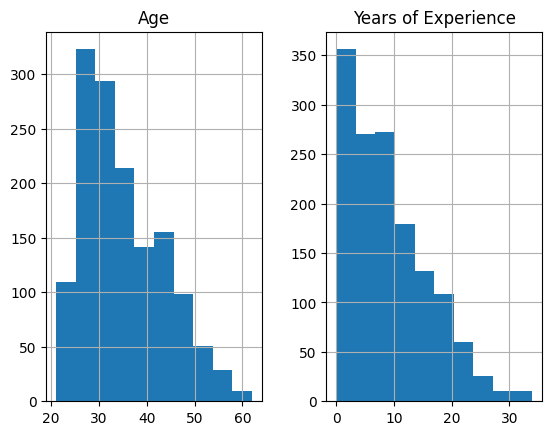

In [24]:
X_train.hist();

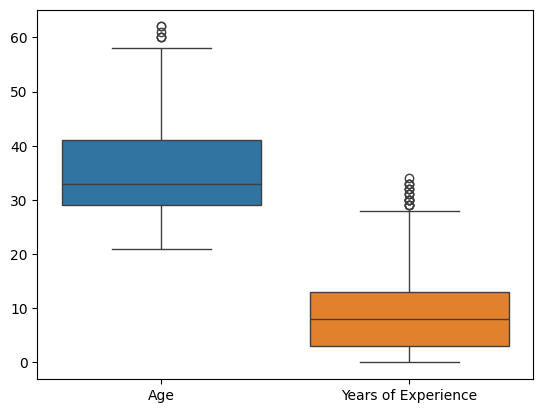

In [25]:
sns.boxplot(df[['Age', 'Years of Experience']]);

In [26]:
df.query('Age > 60')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1211,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0


In [27]:
X_train['Gender'].value_counts()

,count
Gender,
Male,776
Female,648


In [31]:
X_train['Education Level'].value_counts()

,count
Education Level,
Bachelor's,630
Master's,443
PhD,274
High School,77


In [30]:
edu_dic= {'phD':'PhD', 'High School':'High School', "Bachelor's Degree":"Bachelor's",  "Master's Degree":"Master's", "Master's":"Master's", "Bachelor's":"Bachelor's", "PhD":"PhD"}
X_train['Education Level'] = X_train['Education Level'].map(edu_dic)

In [44]:
 X_test['Education Level'] = X_test['Education Level'].map(edu_dic)

In [32]:
X_train['Job Title'].value_counts()

,count
Job Title,
Full Stack Engineer,104
Software Engineer Manager,101
Senior Software Engineer,76
Senior Project Engineer,74
Back end Developer,65
Software Engineer,60
Data Scientist,57
Front end Developer,56
Data Analyst,45


In [33]:
positions = ['junior', 'senior', 'manager', 'director', 'chief', 'vp', 'ceo']

def extract_pos(title):
    for pos in positions:
        if pos in title.lower():
            return pos

    return "junior"

extract_pos("Director of Marketing")

'director'

In [34]:
X_train['Position'] = X_train['Job Title'].apply(extract_pos)

X_test['Position'] = X_test['Job Title'].apply(extract_pos)

<Axes: xlabel='Position', ylabel='Salary'>

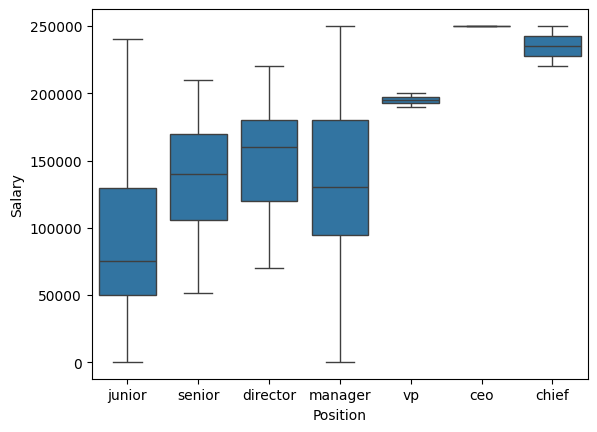

In [35]:
df['Position']  =  df['Job Title'].apply(extract_pos)


sns.boxplot(x ='Position', y='Salary', data = df)

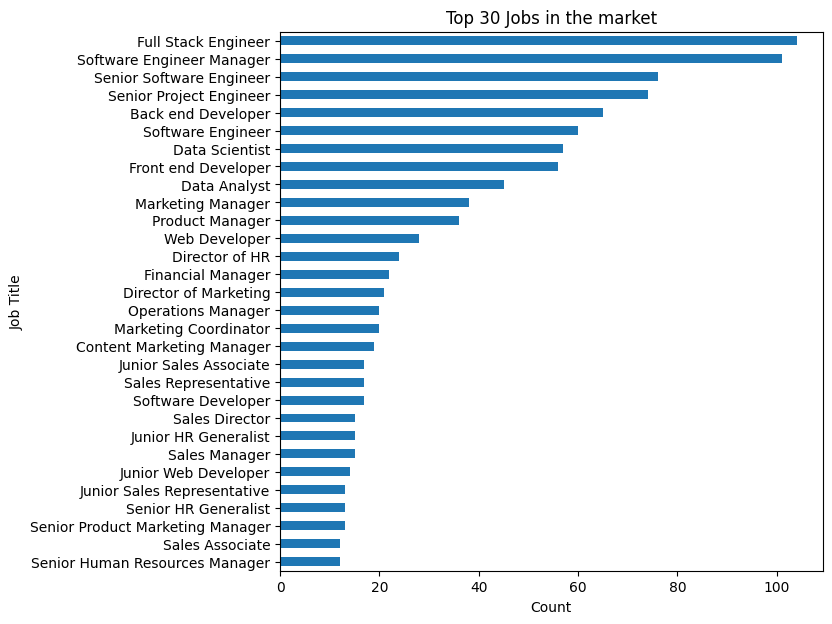

In [36]:
X_train['Job Title'].value_counts().head(30).sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))
plt.xlabel('Count')
plt.title("Top 30 Jobs in the market");

In [39]:
X_train.shape, y_train.shape

((1424, 6), (1424, 1))

In [40]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience,Position
4155,37.0,Male,Bachelor's,Operations Manager,10.0,manager
2404,34.0,Male,Master's,Full Stack Engineer,12.0,junior
978,33.0,Female,Master's,Product Manager,11.0,manager
3138,32.0,Female,Master's,Product Manager,5.0,manager
6320,46.0,Male,Master's,Content Marketing Manager,16.0,manager
...,...,...,...,...,...,...
3420,41.0,Male,Master's,Senior HR Generalist,11.0,senior
4274,37.0,Female,Master's,Marketing Manager,12.0,manager
2603,30.0,Male,Master's,Front end Developer,6.0,junior
5249,36.0,Female,Master's,Marketing Director,11.0,director


In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

ed_levels = ['High School', "Bachelor's", "Master's", 'PhD']

num_pipe = make_pipeline(StandardScaler())

cat_pipe = make_pipeline(OrdinalEncoder(categories=[['Male', 'Female'], ed_levels, positions]))

preproce_pipe = ColumnTransformer([("num", num_pipe, ['Age', 'Years of Experience']),
                                   ("Saad", cat_pipe, ['Gender', 'Education Level', 'Position']),
                                   #("keep_br", 'passthrough', ['keep']),
                                   #("drop_br", 'drop', ['id', ''])
                                  ])


In [45]:
X_train_preprocessed = preproce_pipe.fit_transform(X_train)
X_test_preprocessed = preproce_pipe.transform(X_test)

In [46]:
preproce_pipe.fit_transform(X_train).shape

(1424, 5)

In [47]:
preproce_pipe.fit_transform(X_train)

array([[ 0.22706658,  0.12792129,  0.        ,  1.        ,  2.        ],
       [-0.13953524,  0.42160919,  0.        ,  2.        ,  0.        ],
       [-0.26173585,  0.27476524,  1.        ,  2.        ,  2.        ],
       ...,
       [-0.62833767, -0.4594545 ,  0.        ,  2.        ,  0.        ],
       [ 0.10486597,  0.27476524,  1.        ,  2.        ,  3.        ],
       [-0.62833767, -0.7531424 ,  0.        ,  2.        ,  0.        ]])

In [49]:
y_pred = 13000*X_train['Years of Experience'] + 0
y_pred # predicted salary

,Years of Experience
4155,130000.0
2404,156000.0
978,143000.0
3138,65000.0
6320,208000.0
200,273000.0
15,208000.0
278,104000.0
2412,104000.0
2139,91000.0


In [50]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, y_pred) # comparing actual with prediction

39262.97963483146

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train[['Years of Experience']], y_train)

LinearRegression()

In [52]:
lr.coef_

array([[6177.38830074]])

In [53]:
lr.intercept_

array([56404.22316325])

In [54]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train_preprocessed, y_train)

LinearRegression()

In [55]:
lr_reg.score(X_train_preprocessed, y_train)

0.7224637774311898